In [1]:
#EDA of the cleaned dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Datasets/google_cleanedcsv_part1.csv')
df_copy=df.copy()
df_copy.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [3]:
#App feature
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

In [4]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [5]:
df_copy[df_copy.duplicated('App')].shape

(0, 16)

In [6]:
#Exploring data
numeric_features=[feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 9 numerical features : ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [7]:
##Proportion of count data on categorical cols
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------')

App
ROBLOX                                               0.083026
CBS Sports App - Scores, News, Stats & Watch Live    0.073801
ESPN                                                 0.064576
Duolingo: Learn Languages Free                       0.064576
8 Ball Pool                                          0.064576
                                                       ...   
FieldBi FR Offline                                   0.009225
Golden Dictionary (FR-AR)                            0.009225
FR: My Secret Pets!                                  0.009225
Learn To Draw Kawaii Characters                      0.009225
3D Color Pixel by Number - Sandbox Art Coloring      0.009225
Name: proportion, Length: 9659, dtype: float64
--------------
Category
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNICATIO

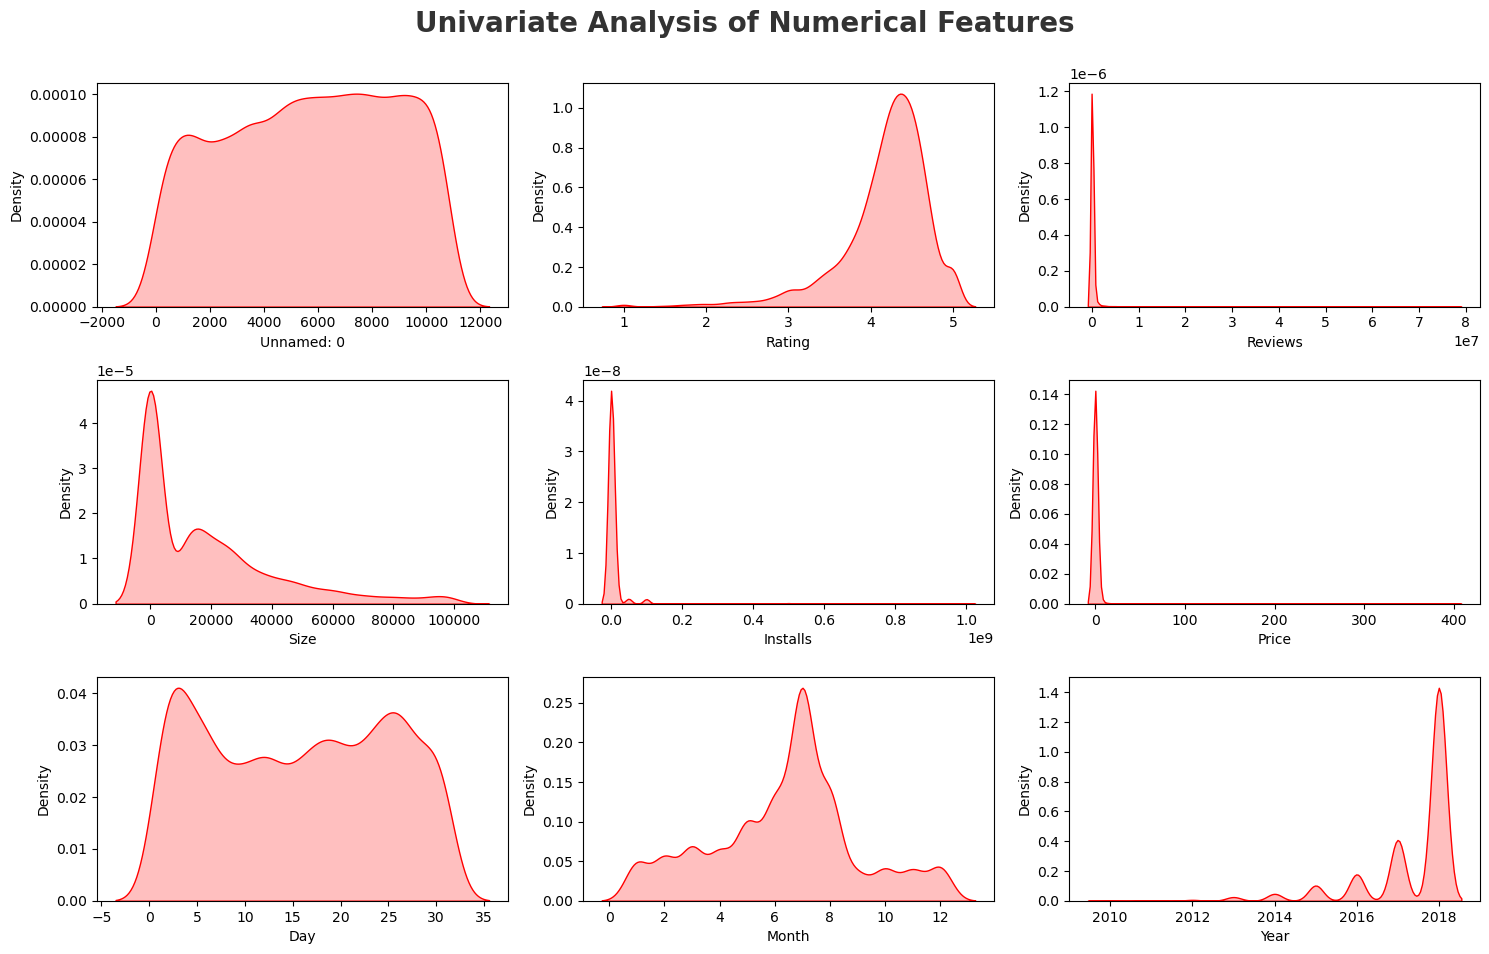

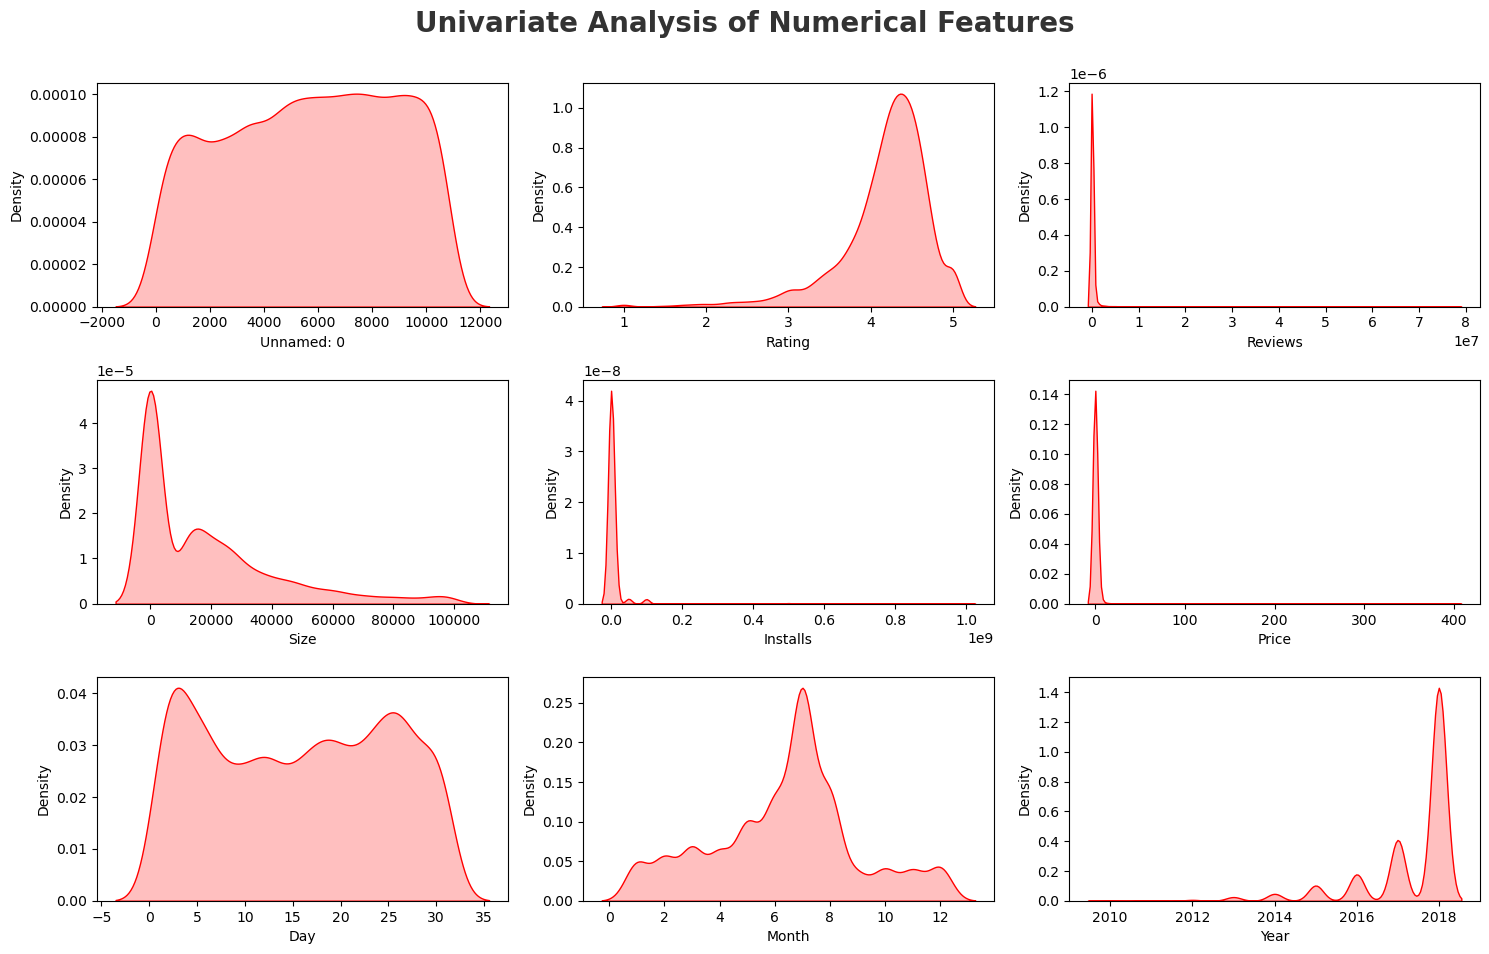

In [11]:
#pictorial rep
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()   

In [ ]:
#observations- Rating and year is left skewed while Reviews,Size,Installs and Price are right skewed


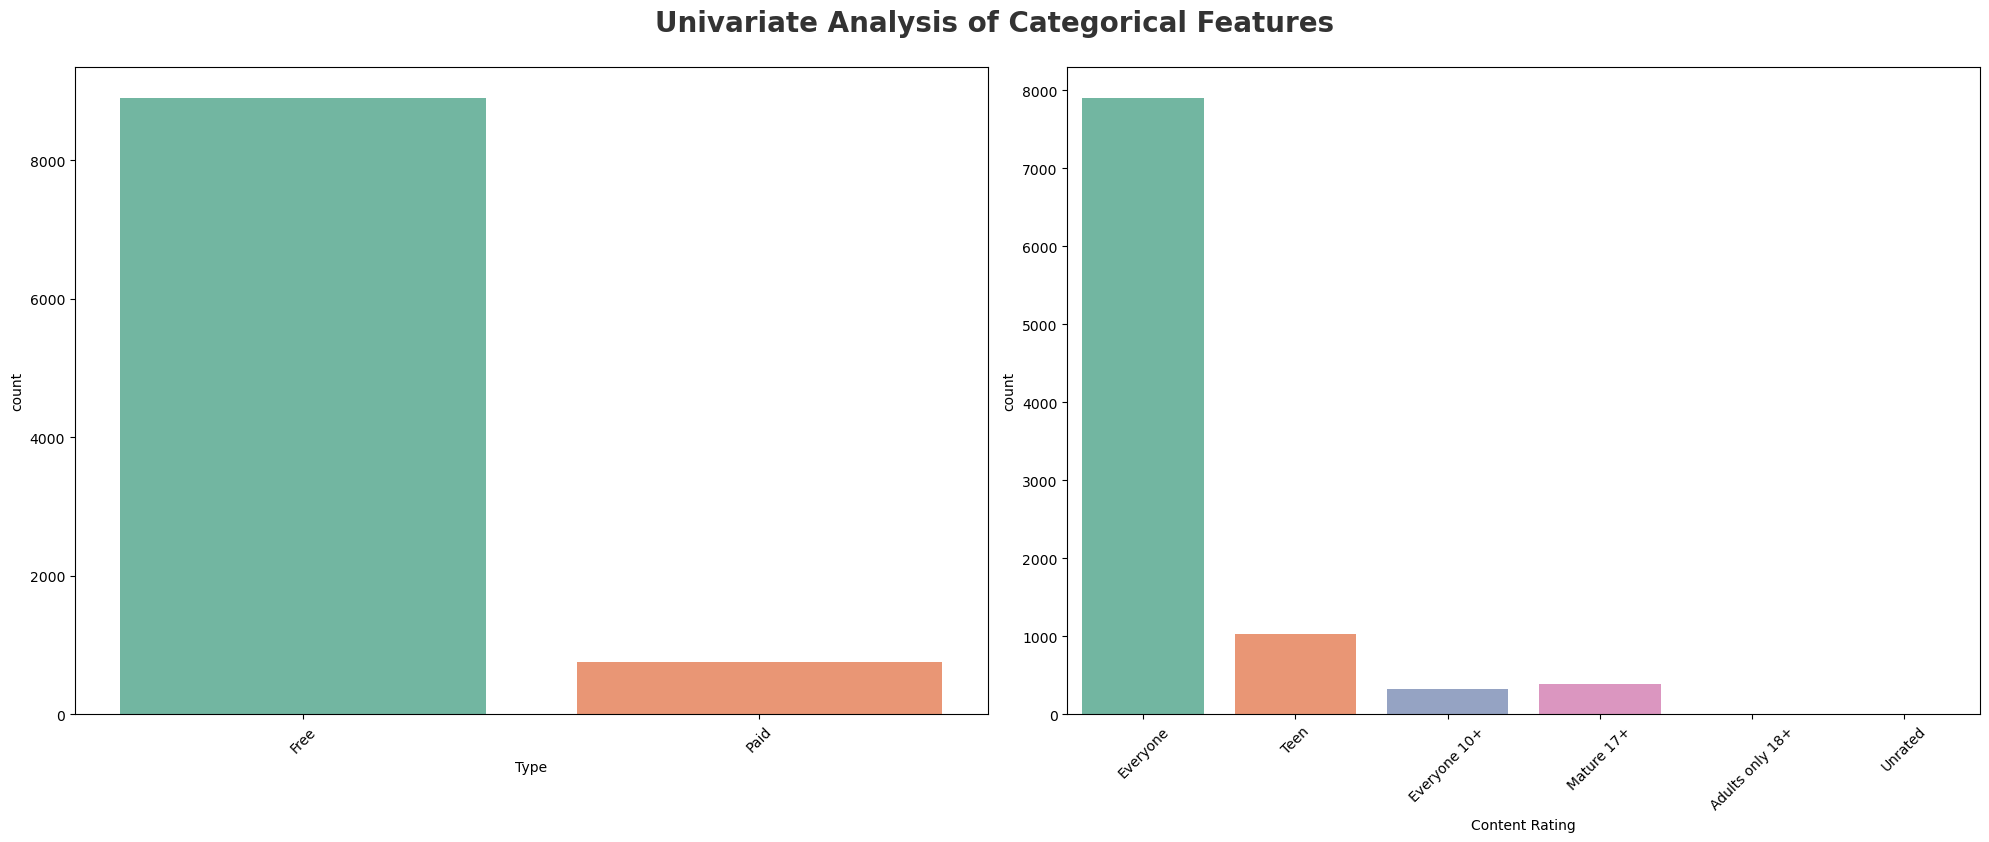

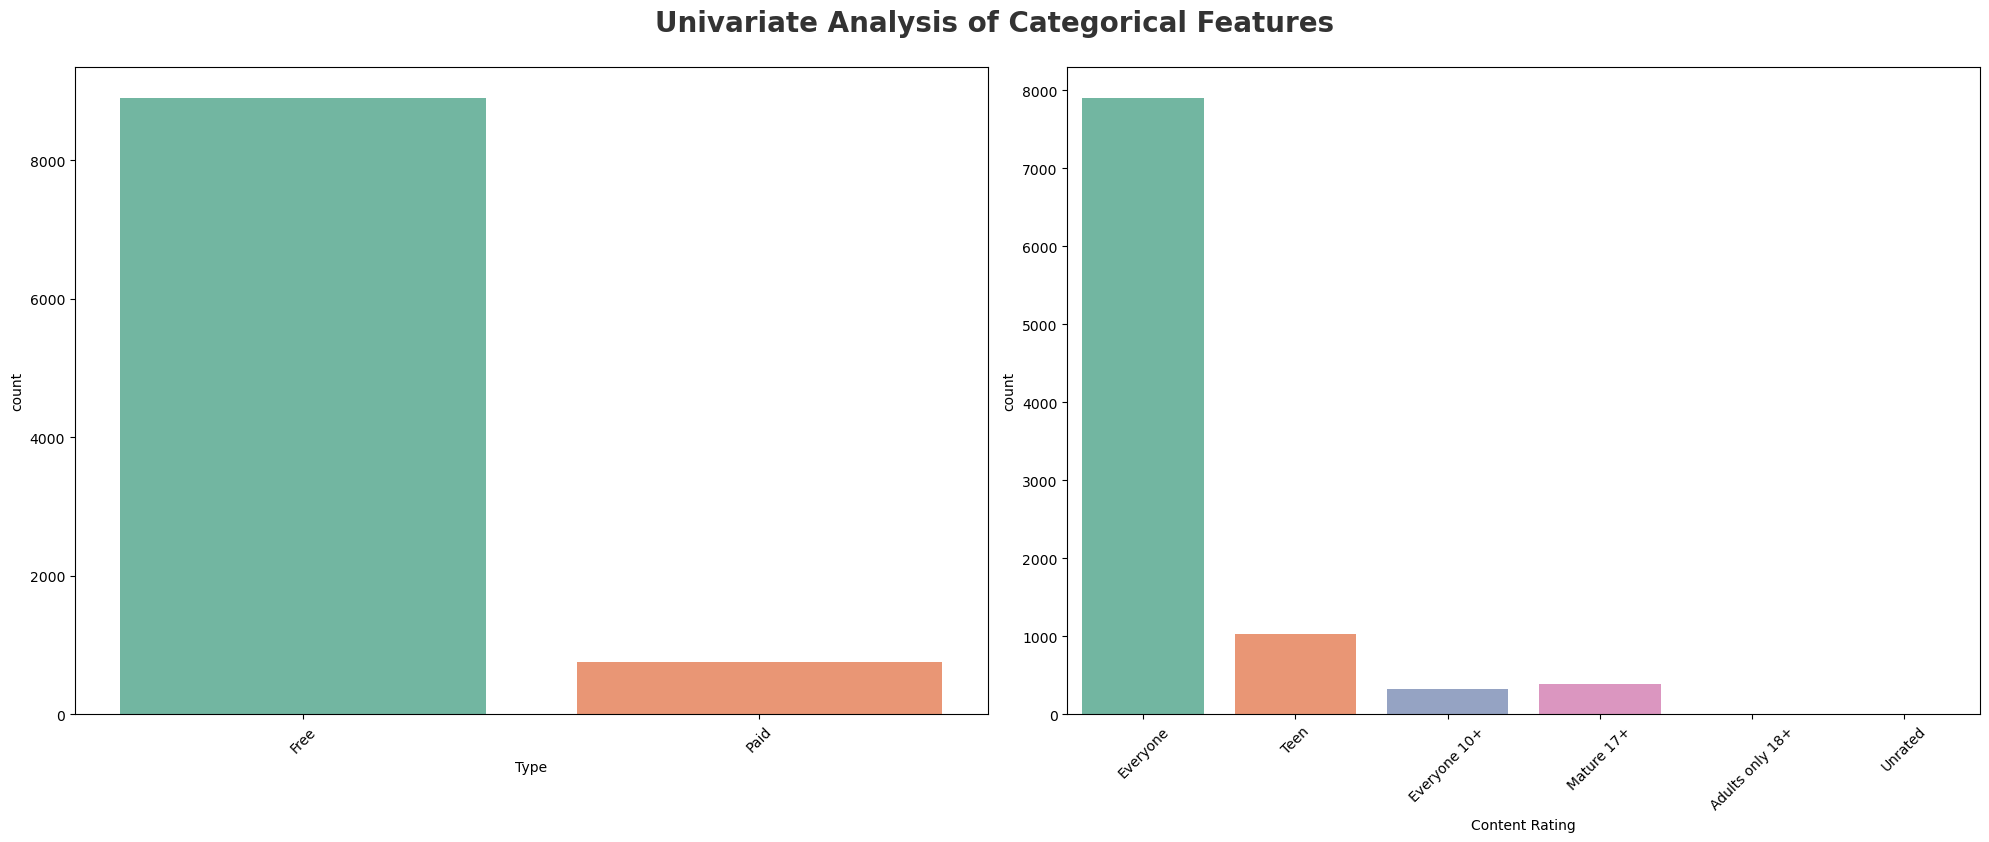

In [16]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']

for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

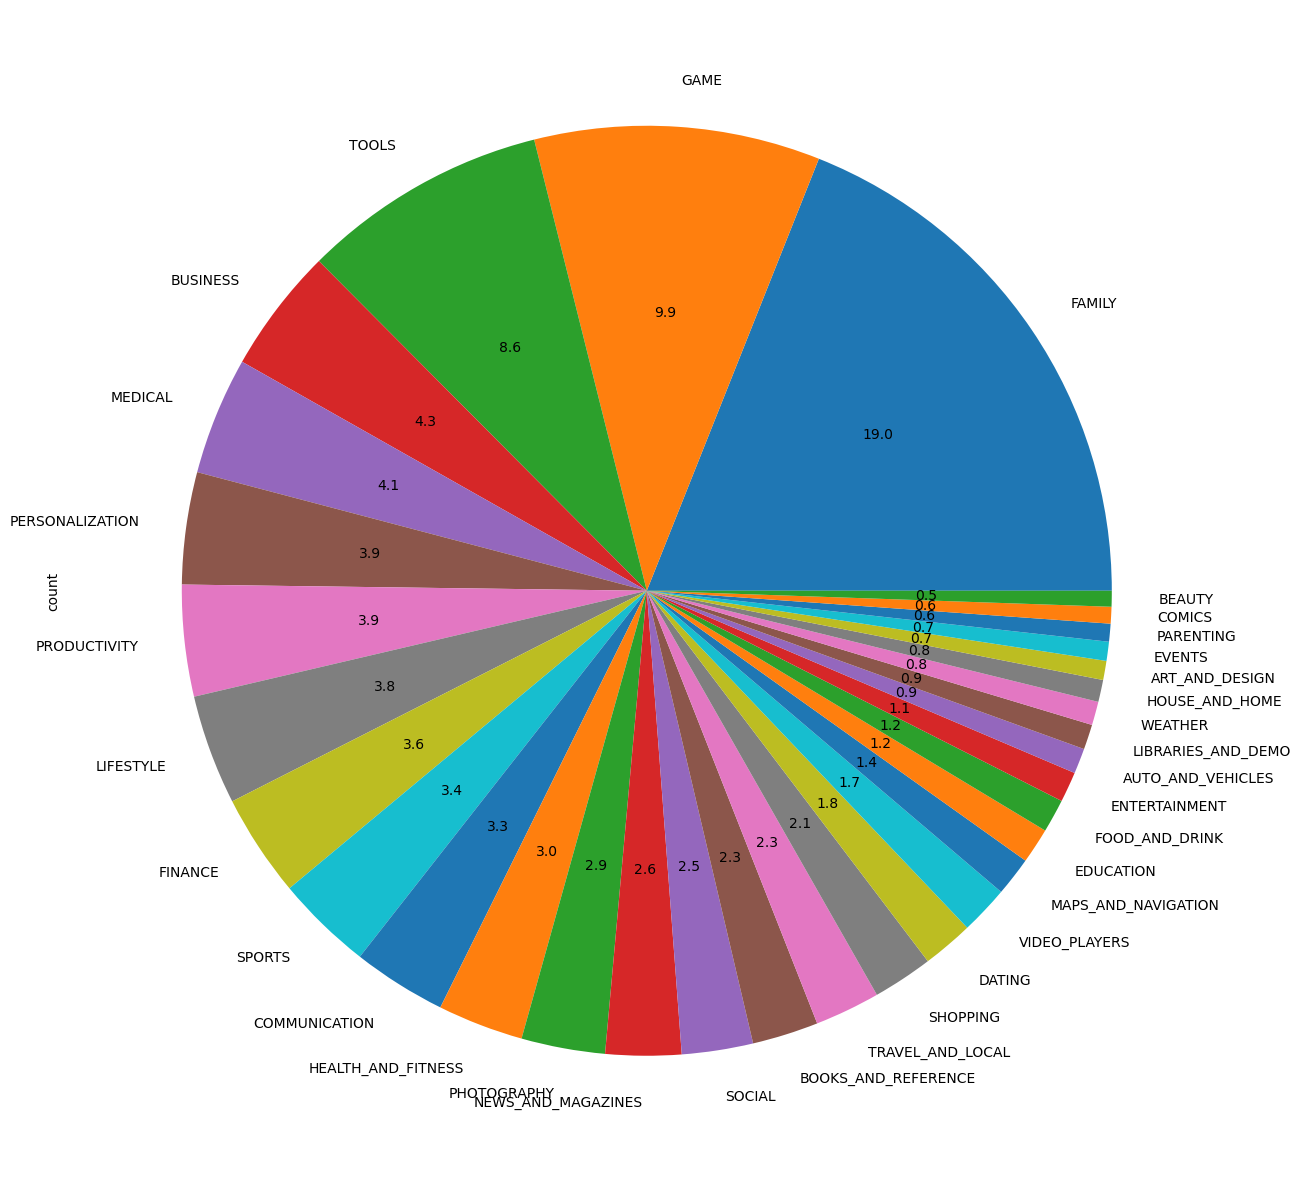

In [21]:
#Which is the most popular category
df_copy['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')
plt.show()

In [ ]:
#Observation- Family is most popular

In [23]:
#Top 10 categories
category=pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

In [24]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

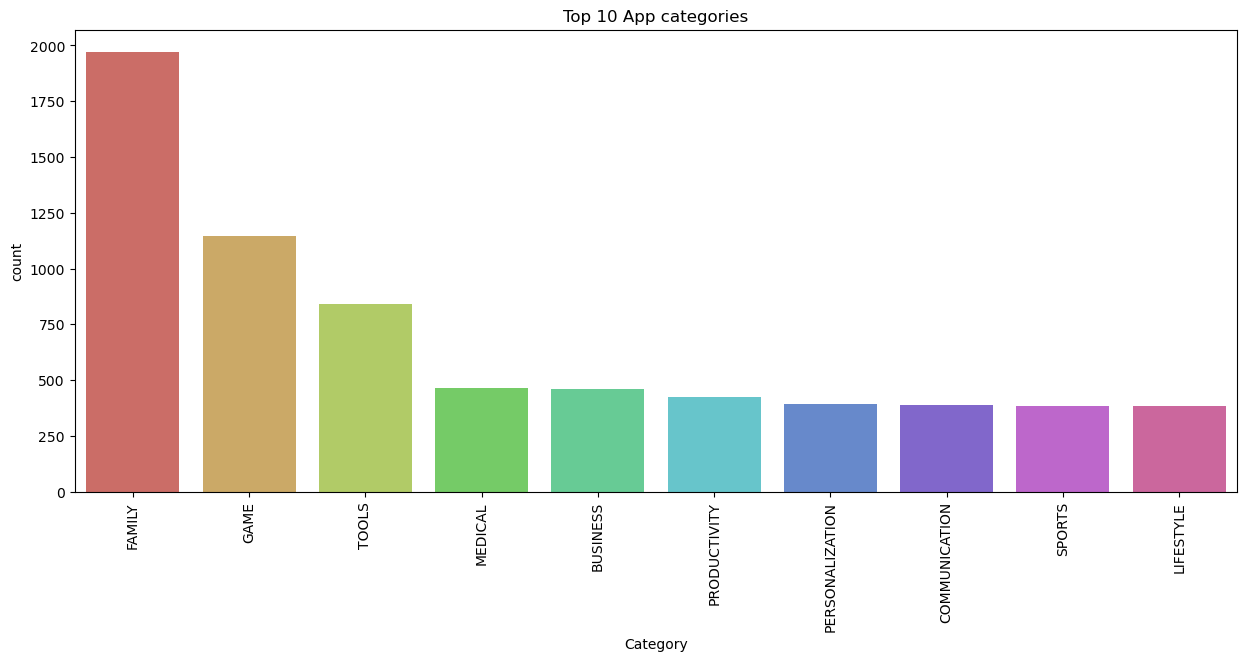

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x= category.index[:10],y='count',data=category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Family category is most


In [ ]:
#which category has largest number of installations
#which are top 5 most installed apps in each popular category
#how many apps are there on google play store which got 5 rating